# SVC

In [302]:
import operator
import nltk
import sklearn
import numpy as np
from sklearn.metrics import precision_score, recall_score, f1_score,accuracy_score
from sklearn.metrics import classification_report

lemmatizer = nltk.stem.WordNetLemmatizer()
def get_vector(vocab, text):
    vector = np.zeros(len(vocab))
    words = []
    for sentence in nltk.tokenize.sent_tokenize(text):
        for token in nltk.tokenize.word_tokenize(sentence):
            words.append(lemmatizer.lemmatize(token).lower())
    for i, word in enumerate(vocab):
        if word in words:
            vector[i] = words.count(word)
    return vector

class SentiSVC(object):
    def __init__(self):
        self.model = sklearn.svm.SVC(kernel="linear", gamma='auto')
        self.vocabulary = []
        print("Senti SVC Created.")

    # Feature: n most frequent words of each label class and combining them together
    def train(self, train_set_x, train_set_y, n=100):
        # Data preprocessing
        stopwords = set(nltk.corpus.stopwords.words("english"))
        additional_stopwords = [".", ",", "'s", "``", "''", "'", "n't", "%", "-", "$", "(", ")", ":", ";", "@", "&", "'m", "user", "#", "!", "?", "..."]
        for sw in additional_stopwords: stopwords.add(sw)
        
        # Prepare vocabulary
        for label in ["0", "1", "2"]:
            # get texts with same label
            temp_list = []
            for i in train_set_x.index:
                if train_set_y.loc[i, "label"] == label:
                    temp_list.append(train_set_x.loc[i, "text"])
            
            # get n most frequent words of this label class
            dict_word_freq = {}
            for text in temp_list:
                for sentence in nltk.tokenize.sent_tokenize(text):
                    for token in nltk.tokenize.word_tokenize(sentence):
                        word = lemmatizer.lemmatize(token).lower()
                        if word in stopwords: continue
                        if word in dict_word_freq: dict_word_freq[word] += 1
                        else: dict_word_freq[word] = 1
                        
            # sort and add first n words in sorted list to vocabulary
            sorted_list = sorted(dict_word_freq.items(), key=operator.itemgetter(1), reverse=True)
            if n < len(sorted_list): sorted_list = sorted_list[:n]
            for word, frequency in sorted_list:
                if word not in self.vocabulary: self.vocabulary.append(word)

        # Create training data
        x, y = [], []
        for i in train_set_x.index:
            x.append(get_vector(self.vocabulary, train_set_x.loc[i, "text"]))
            y.append(train_set_y.loc[i, "label"])

        # Init and train model
        self.model.fit(np.asarray(x), np.asarray(y))
        print("Senti SVC Model Trained.")

    def test(self, val_set_x, val_set_y):
        # test with val set
        x, y = [], []
        for i in val_set_x.index:
            x.append(get_vector(self.vocabulary, val_set_x.loc[i, "text"]))
            y.append(val_set_y.loc[i, "label"])
        predictions = self.model.predict(x)
        y = np.asarray(y)
        #print(str(precision_score(y, predictions, average='macro')))
        #print(str(recall_score(y, predictions, average='macro')))
        #print(str(f1_score(y, predictions, average='macro')))
        #print(str(accuracy_score(y, predictions)))
        print(classification_report(y, predictions))
        c_matrix = metrics.confusion_matrix(y, predictions, normalize='all')
        sn.heatmap(c_matrix, annot=True)
        plt.show();

In [303]:
import pandas as pd
#from SentiRegression import SentiRegression
#from SentiSVC import SentiSVC
#from SentiLexicon import SentiLexicon
#from SentiNB import SentiNB
#from SentiTFIDF import SentiTFIDF

def read_data(set_name):
    text_file_name  = set_name + "_text.txt"
    label_file_name = set_name + "_labels.txt"
    text_file = open(text_file_name, "r", encoding="utf8")
    label_file = open(label_file_name, "r", encoding="utf8")
    x = text_file.readlines()
    y = label_file.readlines()
    text_file.close()
    label_file.close()
    for i in range(len(y)): y[i] = y[i][0]
    return pd.DataFrame(x, columns=["text"]), pd.DataFrame(y, columns=["label"])
train_set_x, train_set_y = read_data("train")

In [304]:
train_set_x, train_set_y = read_data("train")
val_set_x,   val_set_y   = read_data("val")
test_set_x,  test_set_y  = read_data("test")

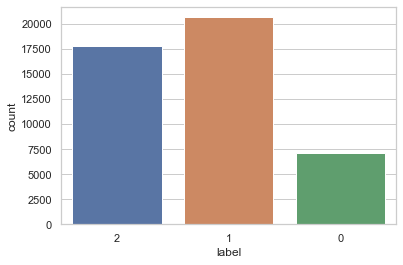

In [327]:
import seaborn as sn
sn.set_theme(style="whitegrid")
ax = sn.countplot(x="label", data=train_set_y)

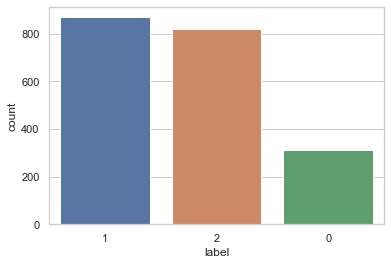

In [328]:
bx = sn.countplot(x="label", data=val_set_y)

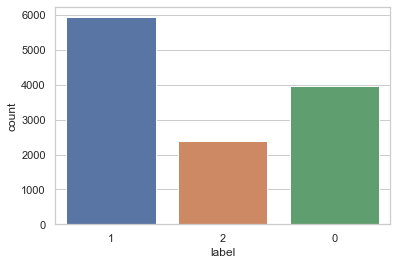

In [307]:
cx = sn.countplot(x="label", data=test_set_y)

In [308]:
senti_svc = SentiSVC()
senti_svc.train(train_set_x, train_set_y, 100)

Senti SVC Created.
Senti SVC Model Trained.


## SVC validation set

              precision    recall  f1-score   support

           0       0.53      0.13      0.21       312
           1       0.50      0.90      0.65       869
           2       0.74      0.32      0.45       819

    accuracy                           0.55      2000
   macro avg       0.59      0.45      0.44      2000
weighted avg       0.60      0.55      0.50      2000



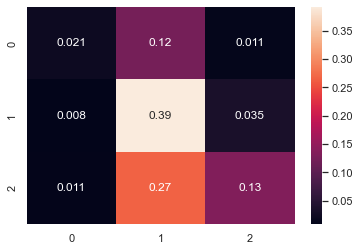

In [309]:
senti_svc.test(val_set_x, val_set_y)

## SVC test set

              precision    recall  f1-score   support

           0       0.67      0.07      0.12      3972
           1       0.51      0.94      0.66      5937
           2       0.54      0.23      0.32      2375

    accuracy                           0.52     12284
   macro avg       0.57      0.41      0.37     12284
weighted avg       0.57      0.52      0.42     12284



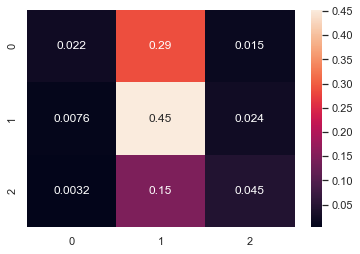

In [310]:
senti_svc.test(test_set_x, test_set_y)

# Regression 

In [320]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import precision_score, recall_score, f1_score,accuracy_score

class SentiRegression(object):
    def __init__(self):
        self.model = LinearRegression()
        self.vocabulary = []
        print("Senti Regression Created.")

    # Feature: n most frequent words of each label class and combining them together
    def train(self, train_set_x, train_set_y, n=100):
        # Data preprocessing
        stopwords = set(nltk.corpus.stopwords.words("english"))
        additional_stopwords = [".", ",", "'s", "``", "''", "'", "n't", "%", "-", "$", "(", ")", ":", ";", "@", "&", "'m", "user", "#", "!", "?", "...", "@user"]
        for sw in additional_stopwords: stopwords.add(sw)
        
        # Prepare vocabulary
        for label in ["0", "1", "2"]:
            # get texts with same label
            temp_list = []
            for i in train_set_x.index:
                if train_set_y.loc[i, "label"] == label:
                    temp_list.append(train_set_x.loc[i, "text"])
            
            # get n most frequent words of this label class
            dict_word_freq = {}
            for text in temp_list:
                for sentence in nltk.tokenize.sent_tokenize(text):
                    for token in nltk.tokenize.word_tokenize(sentence):
                        word = lemmatizer.lemmatize(token).lower()
                        if word in stopwords: continue
                        if word in dict_word_freq: dict_word_freq[word] += 1
                        else: dict_word_freq[word] = 1
                        
            # sort and add first n words in sorted list to vocabulary
            sorted_list = sorted(dict_word_freq.items(), key=operator.itemgetter(1), reverse=True)
            if n < len(sorted_list): sorted_list = sorted_list[:n]
            for word, frequency in sorted_list:
                if word not in self.vocabulary: self.vocabulary.append(word)

        # Create training data
        x, y = [], []
        for i in train_set_x.index:
            x.append(get_vector(self.vocabulary, train_set_x.loc[i, "text"]))
            y.append(train_set_y.loc[i, "label"])

        # Init and train model
        self.model.fit(np.asarray(x), np.asarray(y))
        print("Senti Regression Model Trained.")


    # TODO: find the appropriate bound for classification
    def test(self, val_set_x, val_set_y):
        # test with val set
        x, y = [], []
        for i in val_set_x.index:
            x.append(get_vector(self.vocabulary, val_set_x.loc[i, "text"]))
            y.append(val_set_y.loc[i, "label"])
        predictions = list(self.model.predict(x))
        for i in range(len(predictions)):
            if predictions[i] < 0.5:
                predictions[i] = str(0)
            elif predictions[i] < 1.5:
                predictions[i] = str(1)
            else:
                predictions[i] = str(2)
        predictions = np.asarray(predictions)
        y = np.asarray(y)
        #print(str(precision_score(y, predictions, average='macro')))
        #print(str(recall_score(y, predictions, average='macro')))
        #print(str(f1_score(y, predictions, average='macro')))
        #print(str(accuracy_score(y, predictions)))
        print(classification_report(y, predictions))
        c_matrix = metrics.confusion_matrix(y, predictions, normalize='all')
        sn.heatmap(c_matrix, annot=True)
        plt.show();
        error = []
        #print(len(predictions))
        y_list = val_set_y["label"].tolist()
        x_list = val_set_x["text"].tolist()
        #print(len(y_list))
        for i in range(len(y_list)):
            if y_list[i] != predictions[i]:
                error.append(predictions[i])
        #print(len(error))
        #for i in range(len(x_list)):
         #   print(x_list[i] + "\n")
        Pred_df = pd.DataFrame(predictions, columns=['errors'])
        bx = sn.countplot(x= "errors", data= Pred_df)

In [321]:
senti_regression = SentiRegression()
senti_regression.train(train_set_x, train_set_y, 100)

Senti Regression Created.
Senti Regression Model Trained.


## Regression validation set

              precision    recall  f1-score   support

           0       0.71      0.07      0.13       312
           1       0.49      0.94      0.64       869
           2       0.79      0.28      0.41       819

    accuracy                           0.53      2000
   macro avg       0.66      0.43      0.39      2000
weighted avg       0.64      0.53      0.47      2000



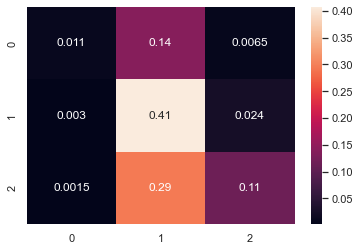

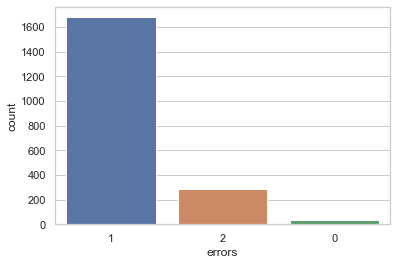

In [322]:
senti_regression.test(val_set_x, val_set_y)

## Regrssion test set

              precision    recall  f1-score   support

           0       0.81      0.03      0.06      3972
           1       0.50      0.97      0.66      5937
           2       0.69      0.16      0.26      2375

    accuracy                           0.51     12284
   macro avg       0.66      0.39      0.33     12284
weighted avg       0.64      0.51      0.39     12284



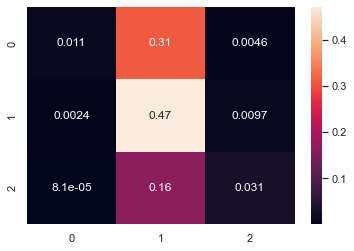

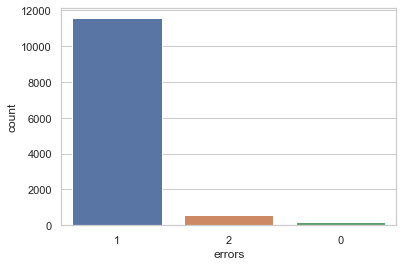

In [323]:
senti_regression.test(test_set_x, test_set_y)

# Lexicon

In [193]:
from nltk.corpus import wordnet as wn
from nltk.corpus import sentiwordnet as swn

lemmatizer = nltk.stem.WordNetLemmatizer()
# Convert between the PennTreebank tags to simple Wordnet tags
def penn_to_wn(tag):
    if tag.startswith('J'):
        return wn.ADJ
    elif tag.startswith('N'):
        return wn.NOUN
    elif tag.startswith('R'):
        return wn.ADV
    elif tag.startswith('V'):
        return wn.VERB
    return None

# stopwords
stopwords = set(nltk.corpus.stopwords.words("english"))
additional_stopwords = [".", ",", "'s", "``", "''", "'",
                        "n't", "%", "-", "$", "(", ")", ":",
                        ";", "@", "&", "'m", "user", "#", "!",
                        "?", "...", "a"]
for sw in additional_stopwords: stopwords.add(sw)

# get average sentimental score of a sentence, per word
def get_senti_score(sentence):
    token = nltk.word_tokenize(sentence)
    # remove stop words
    index = len(token) - 1
    while index >= 0:
        if token[index] in stopwords:
            token.pop(index)
        index -= 1
    after_tagging = nltk.pos_tag(token)
    sentiment = 0.0
    objective = 0.0
    tokens_count = 0
    word_types = [wn.VERB, wn.NOUN, wn.ADJ, wn.ADV]
    for word, tag in after_tagging:
        wn_tag = penn_to_wn(tag)
        if wn_tag not in word_types: continue

        lemma = lemmatizer.lemmatize(word, pos=wn_tag)
        if not lemma: continue

        synsets = list(swn.senti_synsets(lemma, pos=wn_tag))
        if not synsets: continue

        swn_synset = synsets[0]

        sentiment += swn_synset.pos_score() - swn_synset.neg_score()
        objective += swn_synset.obj_score()
        tokens_count += 1
    if tokens_count == 0: return [0, 0]
    return [sentiment / tokens_count, objective / tokens_count]


class SentiLexicon(object):
    def __init__(self):
        self.model = sklearn.svm.SVC(kernel="linear", gamma='auto')
        print("Senti Lexicon Created.")

    def train(self, train_set_x, train_set_y):
        # prepare data
        x = []
        y = []
        for i in train_set_x.index:
            for sentence in nltk.tokenize.sent_tokenize(train_set_x.loc[i, "text"]):
                x.append(get_senti_score(sentence))
                y.append(train_set_y.loc[i, "label"])

        # Train model
        self.model.fit(np.asarray(x), np.asarray(y))
        print("Senti Lexicon Model Trained.")
    
    def test(self, val_set_x, val_set_y):
        x, y = [], []
        for i in val_set_x.index:
            for sentence in nltk.tokenize.sent_tokenize(val_set_x.loc[i, "text"]):
                x.append(get_senti_score(sentence))
                y.append(val_set_y.loc[i, "label"])
        predictions = self.model.predict(x)
        y = np.asarray(y)

        #print("precision_score: " + str(precision_score(y, predictions, average='macro')))
        #print("recall_score: " + str(recall_score(y, predictions, average='macro')))
        #print("f1_score: " + str(f1_score(y, predictions, average='macro')))
        #print("accuracy_score: " + str(accuracy_score(y, predictions)))
        print(classification_report(y, predictions))
        c_matrix = metrics.confusion_matrix(y, predictions, normalize='all')
        sn.heatmap(c_matrix, annot=True)
        plt.show();

In [194]:
senti_lexicon = SentiLexicon()
senti_lexicon.train(train_set_x, train_set_y)

Senti Lexicon Created.
Senti Lexicon Model Trained.


In [43]:
nltk.download('sentiwordnet')

[nltk_data] Downloading package sentiwordnet to
[nltk_data]     C:\Users\c21056034\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping corpora\sentiwordnet.zip.


True

## Lexicon validation set

              precision    recall  f1-score   support

           0       0.00      0.00      0.00       534
           1       0.42      0.85      0.57      1399
           2       0.57      0.25      0.34      1548

    accuracy                           0.45      3481
   macro avg       0.33      0.37      0.30      3481
weighted avg       0.43      0.45      0.38      3481



C:\Users\c21056034\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\c21056034\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\c21056034\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


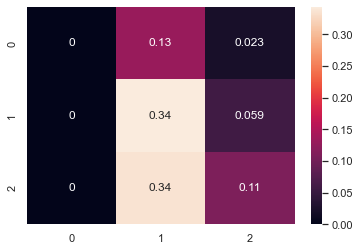

In [196]:
senti_lexicon.test(val_set_x, val_set_y)

## Lexicon test set

C:\Users\c21056034\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\c21056034\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\c21056034\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


              precision    recall  f1-score   support

           0       0.00      0.00      0.00      6599
           1       0.46      0.81      0.59      8521
           2       0.32      0.33      0.32      3887

    accuracy                           0.43     19007
   macro avg       0.26      0.38      0.30     19007
weighted avg       0.27      0.43      0.33     19007



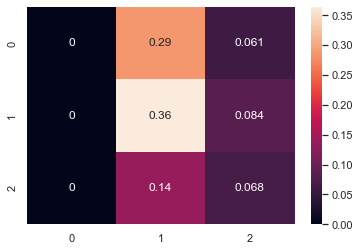

In [197]:
senti_lexicon.test(test_set_x, test_set_y)

# Naive Bayes

In [198]:
import operator
import nltk
import sklearn
import numpy as np
from sklearn.metrics import precision_score, recall_score, f1_score,accuracy_score
from sklearn.naive_bayes import GaussianNB
from sklearn import metrics
import seaborn as sn
import matplotlib.pyplot as plt


class SentiNB(object):
    def __init__(self):
        self.model = GaussianNB()
        self.vocabulary = []
        print("Senti Naive Bayes Created.")

    # Feature: n most frequent words of each label class and combining them together
    def train(self, train_set_x, train_set_y, n=100):
        # Data preprocessing
        stopwords = set(nltk.corpus.stopwords.words("english"))
        additional_stopwords = [".", ",", "'s", "``", "''", "'", "n't", "%", "-", "$", "(", ")", ":", ";", "@", "&", "'m", "user", "#", "!", "?", "..."]
        for sw in additional_stopwords: stopwords.add(sw)
        
        # Prepare vocabulary
        for label in ["0", "1", "2"]:
            # get texts with same label
            temp_list = []
            for i in train_set_x.index:
                if train_set_y.loc[i, "label"] == label:
                    temp_list.append(train_set_x.loc[i, "text"])
            
            # get n most frequent words of this label class
            dict_word_freq = {}
            for text in temp_list:
                for sentence in nltk.tokenize.sent_tokenize(text):
                    for token in nltk.tokenize.word_tokenize(sentence):
                        word = lemmatizer.lemmatize(token).lower()
                        if word in stopwords: continue
                        if word in dict_word_freq: dict_word_freq[word] += 1
                        else: dict_word_freq[word] = 1
                        
            # sort and add first n words in sorted list to vocabulary
            sorted_list = sorted(dict_word_freq.items(), key=operator.itemgetter(1), reverse=True)
            if n < len(sorted_list): sorted_list = sorted_list[:n]
            for word, frequency in sorted_list:
                if word not in self.vocabulary: self.vocabulary.append(word)

        # Create training data
        x, y = [], []
        for i in train_set_x.index:
            x.append(get_vector(self.vocabulary, train_set_x.loc[i, "text"]))
            y.append(train_set_y.loc[i, "label"])

        # Init and train model
        self.model.fit(np.asarray(x), np.asarray(y))
        print("Senti Naive Bayes Model Trained.")

    def test(self, val_set_x, val_set_y):
        # test with val set
        x, y = [], []
        for i in val_set_x.index:
            x.append(get_vector(self.vocabulary, val_set_x.loc[i, "text"]))
            y.append(val_set_y.loc[i, "label"])
        predictions = self.model.predict(x)
        y = np.asarray(y)
        #print(str(precision_score(y, predictions, average='macro')))
        #print(str(recall_score(y, predictions, average='macro')))
        #print(str(f1_score(y, predictions, average='macro')))
        #print(str(accuracy_score(y, predictions)))
        print(classification_report(y, predictions))
        c_matrix = metrics.confusion_matrix(y, predictions, normalize='all')
        sn.heatmap(c_matrix, annot=True)
        plt.show();


In [199]:
senti_nb = SentiNB()
senti_nb.train(train_set_x, train_set_y)

Senti Naive Bayes Created.
Senti Naive Bayes Model Trained.


## NB validation set

              precision    recall  f1-score   support

           0       0.34      0.39      0.36       312
           1       0.54      0.61      0.57       869
           2       0.62      0.50      0.56       819

    accuracy                           0.53      2000
   macro avg       0.50      0.50      0.50      2000
weighted avg       0.54      0.53      0.53      2000



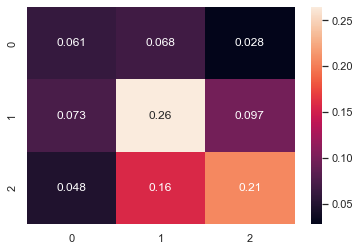

In [200]:
senti_nb.test(val_set_x, val_set_y)

## NB Test set

              precision    recall  f1-score   support

           0       0.52      0.38      0.44      3972
           1       0.55      0.69      0.61      5937
           2       0.43      0.35      0.38      2375

    accuracy                           0.52     12284
   macro avg       0.50      0.47      0.48     12284
weighted avg       0.52      0.52      0.51     12284



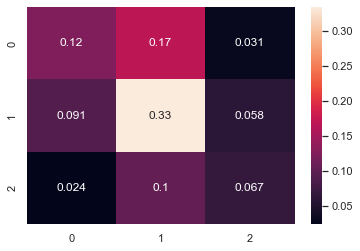

In [201]:
senti_nb.test(test_set_x, test_set_y)